In [1]:
import pandas as pd
import numpy as np
import warnings
import riskfolio as rp
import yfinance as yf
warnings.filterwarnings("ignore")

In [2]:
def get_data(start, end, assets):
    pd.options.display.float_format = '{:.4%}'.format

    data = yf.download(assets, start = start, end = end)
    data = data.loc[:,('Adj Close', slice(None))]
    data.columns = assets
    return data

def get_returns(assets, data):
    Y = data[assets].pct_change().dropna()
    return Y

In [3]:
import riskfolio as rp

def generate_dendrogram_plot(returns , codependence ='pearson', linkage='average', k=None, max_k=10, leaf_order=True, ax=None):
    ax = rp.plot_dendrogram(returns=returns,
                        codependence=codependence,
                        linkage=linkage,
                        k=k,
                        max_k=max_k,
                        leaf_order=leaf_order,
                        ax=ax)


In [4]:
def get_weights_and_port(returns, model='HRP', codependence='pearson', rm='UCI_Rel', rf=0, linkage='average', max_k=10, leaf_order=True):
    # Building the portfolio object
    port = rp.HCPortfolio(returns=returns)

    # Estimate optimal portfolio
    w = port.optimization(model=model,
                          codependence=codependence,
                          rm=rm,
                          rf=rf,
                          linkage=linkage,
                          max_k=max_k,
                          leaf_order=leaf_order)
    return w,port


In [5]:
def display_hrp_pie_visualization(weights):
    ax = rp.plot_pie(w=weights,
                 title='HRP Naive Risk Parity',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=8,
                 width=10,
                 ax=None) 

In [42]:
def visualize_asset_risk(returns, weight, rm='UCI_Rel'):
    mu = returns.mean()
    cov = returns.cov() # Covariance matrix
    returns = returns # Returns of the assets

    ax = rp.plot_risk_con(w=weight,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

In [7]:
# Risk Measures available:
#
# 'vol': Standard Deviation.
# 'MV': Variance.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'VaR': Conditional Value at Risk.
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'DaR': Drawdown at Risk of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.
# 'MDD_Rel': Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
# 'ADD_Rel': Average Drawdown of compounded cumulative returns.
# 'DaR_Rel': Drawdown at Risk of compounded cumulative returns.
# 'CDaR_Rel': Conditional Drawdown at Risk of compounded cumulative returns.
# 'EDaR_Rel': Entropic Drawdown at Risk of compounded cumulative returns.
# 'UCI_Rel': Ulcer Index of compounded cumulative returns.

def calculate_risk_metrics(port, model='HRP', rf=0, linkage='average', max_k=10, leaf_order=True):
    w_s = pd.DataFrame([])
    
    rms = ['vol', 'MV', 'MAD', 'MSV', 'FLPM', 'SLPM',
       'VaR','CVaR', 'EVaR', 'WR', 'MDD', 'ADD',
       'DaR', 'CDaR', 'EDaR', 'UCI', 'MDD_Rel', 'ADD_Rel',
       'DaR_Rel', 'CDaR_Rel', 'EDaR_Rel', 'UCI_Rel']

    for i in rms:
        w = port.optimization(model=model,
                              rm=i,
                              rf=rf,
                              linkage=linkage,
                              max_k=max_k, 
                              leaf_order=leaf_order)

        w_s = pd.concat([w_s, w], axis=1)
    
    w_s.columns = rms
    
    return w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')


In [8]:
def calculate_portfolio_value(w, data, initial_amount=1000000):
    # Ensure weights are in float format
    weight = w['weights']
# Calculate the number of stocks to buy for each asset
    stocks =( weight*initial_amount / data.iloc[0])
# stocks = stocks.astype(int)
    capital_left = initial_amount - (stocks * data.iloc[0]).sum()
    portfolio_value = (stocks * data.iloc[-1]).sum() + capital_left

#     print(f'''The value of the portfolio is: {portfolio_value:.2f}
# Returns from the given portfolio management are {(portfolio_value - initial_amount)*100/initial_amount:.2f}''')
    return portfolio_value

In [9]:
assets = ["ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", 
          "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
          "BEL.NS", "BPCL.NS", "BHARTIARTL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS",
          "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS", 
          "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "INDUSINDBK.NS", 
          "INFY.NS", "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS", "M&M.NS", "MARUTI.NS",
          "NESTLEIND.NS", "NTPC.NS", "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS", 
          "SHRIRAMFIN.NS", "SBIN.NS", "SUNPHARMA.NS", "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", 
          "TATASTEEL.NS", "TECHM.NS", "TITAN.NS", "TRENT.NS", "ULTRACEMCO.NS", "WIPRO.NS"
]

assets.sort()
data = get_data("2023-01-01", "2024-01-01", assets)
Y = get_returns(assets, data)
w, port = get_weights_and_port(Y)

[*********************100%%**********************]  48 of 48 completed


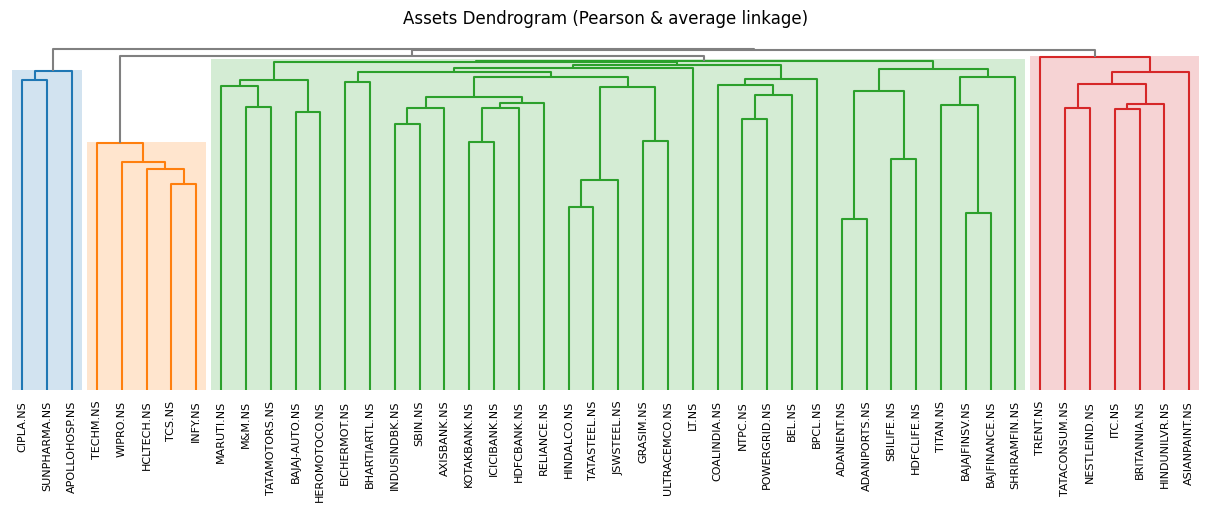

In [10]:
generate_dendrogram_plot(Y)

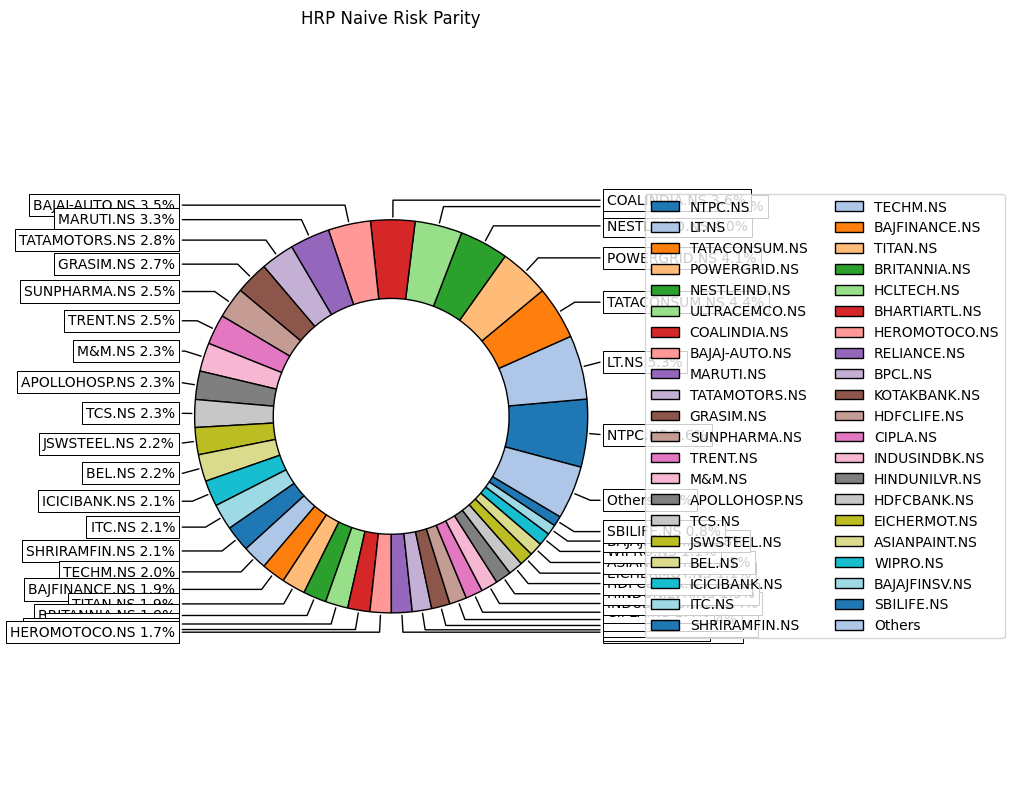

In [11]:
display_hrp_pie_visualization(w)

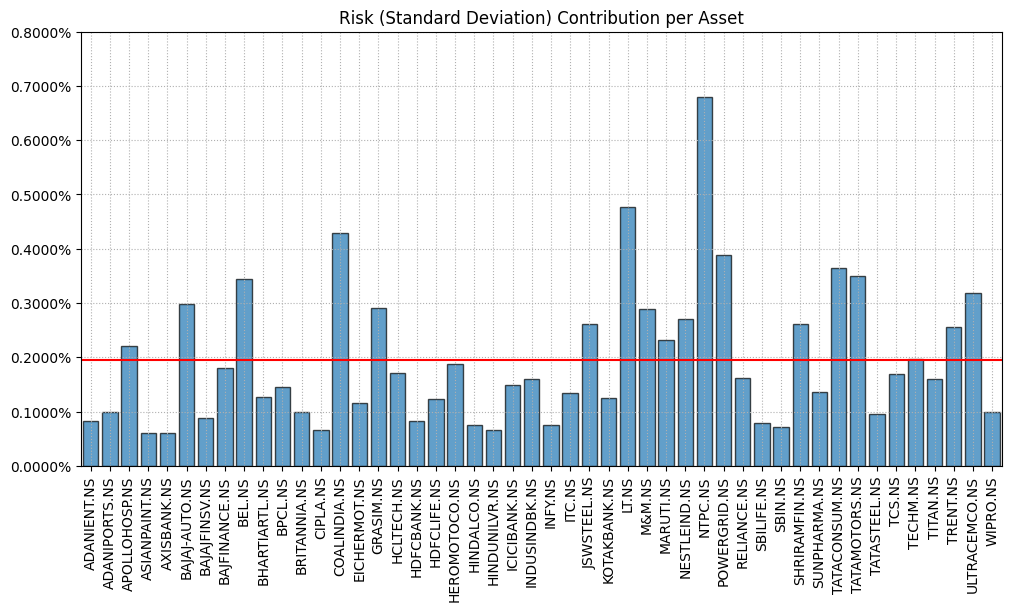

In [12]:
visualize_asset_risk(Y, w)

In [13]:
calculate_risk_metrics(port)

,vol,MV,MAD,MSV,FLPM,SLPM,VaR,CVaR,EVaR,WR,MDD,ADD,DaR,CDaR,EDaR,UCI,MDD_Rel,ADD_Rel,DaR_Rel,CDaR_Rel,EDaR_Rel,UCI_Rel
ADANIENT.NS,0.78%,0.21%,1.02%,0.75%,0.84%,0.67%,1.03%,0.60%,0.50%,0.50%,0.38%,0.30%,0.28%,0.30%,0.35%,0.32%,0.45%,0.26%,0.29%,0.34%,0.40%,0.31%
ADANIPORTS.NS,0.77%,0.44%,0.95%,0.69%,0.86%,0.64%,1.03%,0.60%,0.40%,0.37%,0.41%,0.54%,0.37%,0.38%,0.40%,0.49%,0.39%,0.52%,0.34%,0.35%,0.38%,0.49%
APOLLOHOSP.NS,1.87%,2.02%,1.78%,2.00%,1.78%,2.03%,1.90%,2.29%,2.77%,2.85%,2.54%,2.24%,2.57%,2.55%,2.58%,2.38%,2.51%,2.19%,2.56%,2.56%,2.57%,2.33%
ASIANPAINT.NS,2.25%,3.00%,2.24%,1.99%,2.05%,1.88%,2.06%,1.65%,1.66%,1.69%,1.29%,0.94%,1.49%,1.34%,1.29%,1.08%,1.34%,0.95%,1.50%,1.37%,1.32%,1.09%
AXISBANK.NS,1.78%,1.83%,1.78%,1.78%,1.62%,1.67%,1.84%,1.64%,1.49%,1.46%,0.93%,0.71%,0.70%,0.77%,0.82%,0.73%,0.98%,0.74%,0.77%,0.83%,0.87%,0.76%
BAJAJ-AUTO.NS,1.63%,1.55%,1.71%,1.72%,2.26%,2.01%,2.04%,1.95%,1.51%,1.26%,2.58%,4.07%,3.13%,2.75%,2.76%,3.56%,2.53%,3.97%,3.12%,2.74%,2.73%,3.49%
BAJAJFINSV.NS,1.73%,1.75%,1.80%,1.65%,1.66%,1.57%,1.38%,1.38%,1.57%,1.56%,1.05%,0.81%,0.99%,1.06%,1.04%,0.83%,1.09%,0.83%,1.01%,1.08%,1.06%,0.84%
BAJFINANCE.NS,2.63%,2.09%,2.65%,2.67%,2.55%,2.62%,2.41%,2.58%,2.42%,2.38%,2.57%,1.81%,2.47%,2.61%,2.57%,1.94%,2.59%,1.82%,2.52%,2.61%,2.58%,1.95%
BEL.NS,1.31%,1.13%,1.32%,1.23%,1.47%,1.26%,1.21%,1.04%,1.04%,0.96%,1.97%,2.55%,1.89%,1.99%,2.01%,2.26%,1.78%,2.53%,1.71%,1.80%,1.83%,2.22%
BHARTIARTL.NS,2.23%,2.88%,2.18%,2.29%,2.19%,2.29%,2.47%,2.36%,2.10%,2.09%,1.64%,1.80%,1.65%,1.57%,1.61%,1.84%,1.65%,1.78%,1.65%,1.58%,1.61%,1.82%


In [14]:
start_dates_train = ["2022-01-01", "2022-07-01", "2023-01-01", "2023-07-01"]
end_dates_train = ["2023-01-01", "2023-07-01", "2024-01-01", "2024-07-01"]

start_dates_test = [ "2023-01-01", "2023-07-01", "2024-01-01", "2024-07-01"]
end_dates_test = [ "2023-07-01", "2024-01-01", "2024-07-01", "2025-01-01"]

train_date = pd.DataFrame({
    'start_dates': start_dates_train,
    'end_dates': end_dates_train
}
)
test_date = pd.DataFrame({
    'start_dates': start_dates_test,
    'end_dates': end_dates_test
}
)

In [45]:
def dynamic_weight_switching(train_date, test_date, assets):
    import time
    assets.sort()
    initial_value = 1000000
    portfolio_value = pd.Series()
    for i in range(len(train_date)):
        data_train = get_data(train_date['start_dates'][i], train_date['end_dates'][i], assets)
        Y = get_returns(assets, data_train)
        w, port = get_weights_and_port(Y, model="HRP")              ## HRP or HERC
        data_test = get_data(test_date['start_dates'][i], test_date['end_dates'][i], assets)
        Y_test = get_returns(assets, data_test)
        portfolio_returns = (Y_test * w['weights']).sum(axis=1)
        portfolio = (1 + portfolio_returns).cumprod() * initial_value
        initial_value = calculate_portfolio_value(w, data_test, initial_amount=initial_value)
        portfolio_value = pd.concat([portfolio_value, portfolio])
    total_data = get_data(test_date['start_dates'][0], test_date['end_dates'][i], assets)
    total_data['portfolio'] = portfolio_value
    return total_data


In [46]:
assets = ["ADANIENT.NS", "ADANIPORTS.NS", "APOLLOHOSP.NS", "ASIANPAINT.NS", 
          "AXISBANK.NS", "BAJAJ-AUTO.NS", "BAJFINANCE.NS", "BAJAJFINSV.NS",
          "BEL.NS", "BPCL.NS", "BHARTIARTL.NS", "BRITANNIA.NS", "CIPLA.NS", "COALINDIA.NS",
          "EICHERMOT.NS", "GRASIM.NS", "HCLTECH.NS", "HDFCBANK.NS", "HDFCLIFE.NS", 
          "HEROMOTOCO.NS", "HINDALCO.NS", "HINDUNILVR.NS", "ICICIBANK.NS", "INDUSINDBK.NS", 
          "INFY.NS", "ITC.NS", "JSWSTEEL.NS", "KOTAKBANK.NS", "LT.NS", "M&M.NS", "MARUTI.NS",
          "NESTLEIND.NS", "NTPC.NS", "POWERGRID.NS", "RELIANCE.NS", "SBILIFE.NS", 
          "SHRIRAMFIN.NS", "SBIN.NS", "SUNPHARMA.NS", "TCS.NS", "TATACONSUM.NS", "TATAMOTORS.NS", 
          "TATASTEEL.NS", "TECHM.NS", "TITAN.NS", "TRENT.NS", "ULTRACEMCO.NS", "WIPRO.NS"
]
total_data = dynamic_weight_switching(train_date, test_date, assets)

[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed
[*********************100%%**********************]  48 of 48 completed


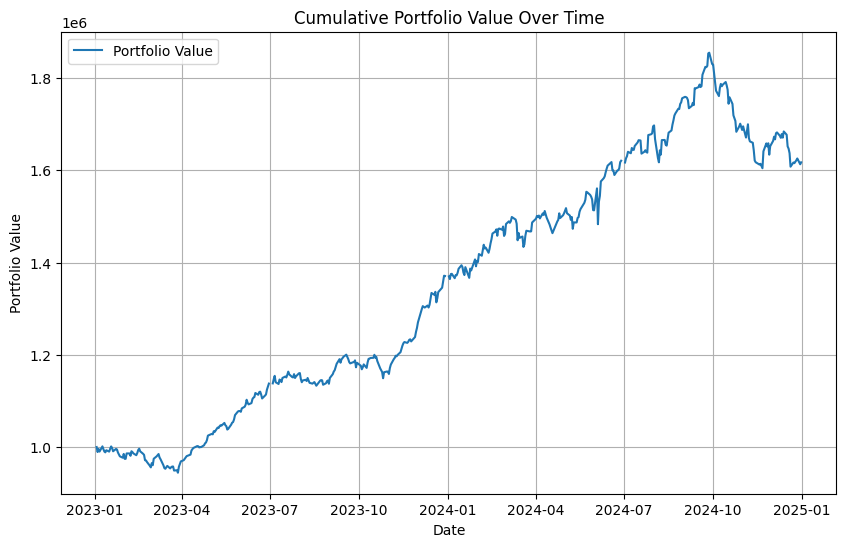

In [47]:
import matplotlib.pyplot as plt

# Plot the cumulative portfolio value
plt.figure(figsize=(10, 6))
plt.plot(total_data['portfolio'], label='Portfolio Value')
plt.title('Cumulative Portfolio Value Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
initial_amount = 1000000
final_capital = total_data['portfolio'][-1]
print(f'''The value of the portfolio is: {final_capital:.2f}
Returns from the given portfolio management are {(final_capital - initial_amount)*100/initial_amount:.2f}''')

The value of the portfolio is: 1616998.39
Returns from the given portfolio management are 61.70
